In [1]:
#loading external libraries, predefined functions etc. in a seperate script for a cleaner notebook
from Co2_setup import * 

In [5]:
df = pd.read_csv('Co2WithVolumetricAtomTypes.csv')
df = df.dropna()

select_mof = ['AHOKIR01', 'BOHGOU', 'CICYIX', 'EBEMEF', 'FIGXAU', 'FIGXEY', 'FIVNAZ', 'FUTJOV', 'GISZUD', 'HAKWUM', 'IGAHED', 'KAHPUE', 'KECRAL10', 'LIKFOB', 'LUFQUZ01', 'LUFQUZ02', 'LUFQUZ', 'MOCHES', 'MOCHIW', 'MOCHOC', 'MOCHUI', 'MOCJAQ', 'MOCJEU', 'MOCJIY', 'NINHOH', 'NIVWIY', 'OLOKEF', 'PIYZAZ', 'REGJIW', 'RENWEM01', 'RONZID', 'RURPAW', 'RURPEA', 'SOBZOY', 'TILVUF', 'TILWAM', 'UHISOU', 'XOMCIL']

df = df[df["MOF"].isin(select_mof)]
len(df)

114

# Machine Learning Using All Descriptors

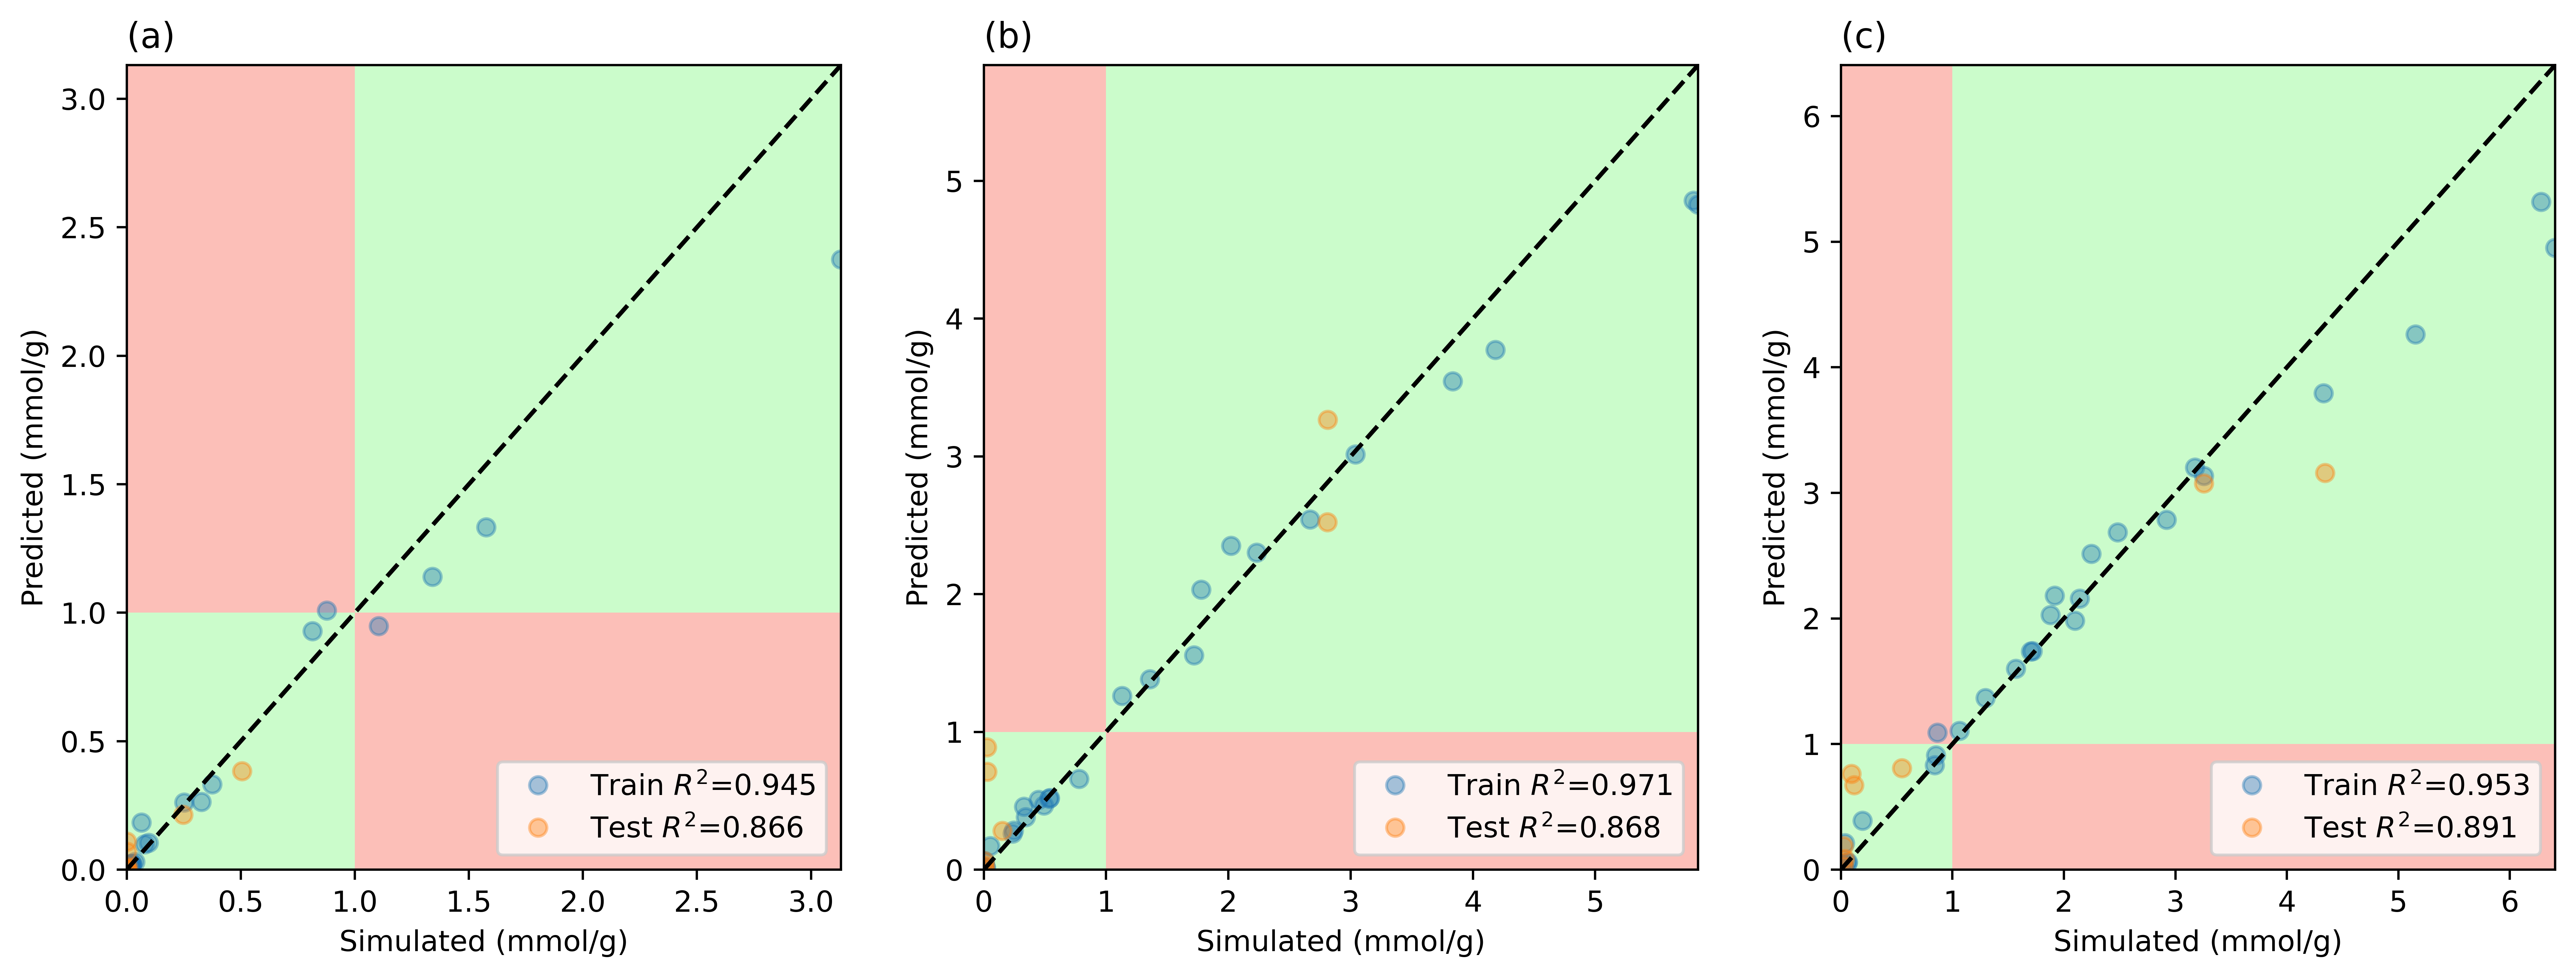

In [6]:
all_desc_pc = {}

all_desc_pc['1 mmol/g'] = {}
fig, ax = plt.subplots(1,3,dpi=700,figsize = (15,5))

X,y = X_y_from_pressure(df,40)
all_desc_pc['1 mmol/g']['40Pa'] = evaluate_ML(ml,X,y,ax[0],"(a)")

X,y = X_y_from_pressure(df,1000)
all_desc_pc['1 mmol/g']['1000Pa'] = evaluate_ML(ml,X,y,ax[1],"(b)")

X,y = X_y_from_pressure(df,4000)
all_desc_pc['1 mmol/g']['4000Pa'] = evaluate_ML(ml,X,y,ax[2],"(c)")

# Excluding Henry Coeff from Descriptors

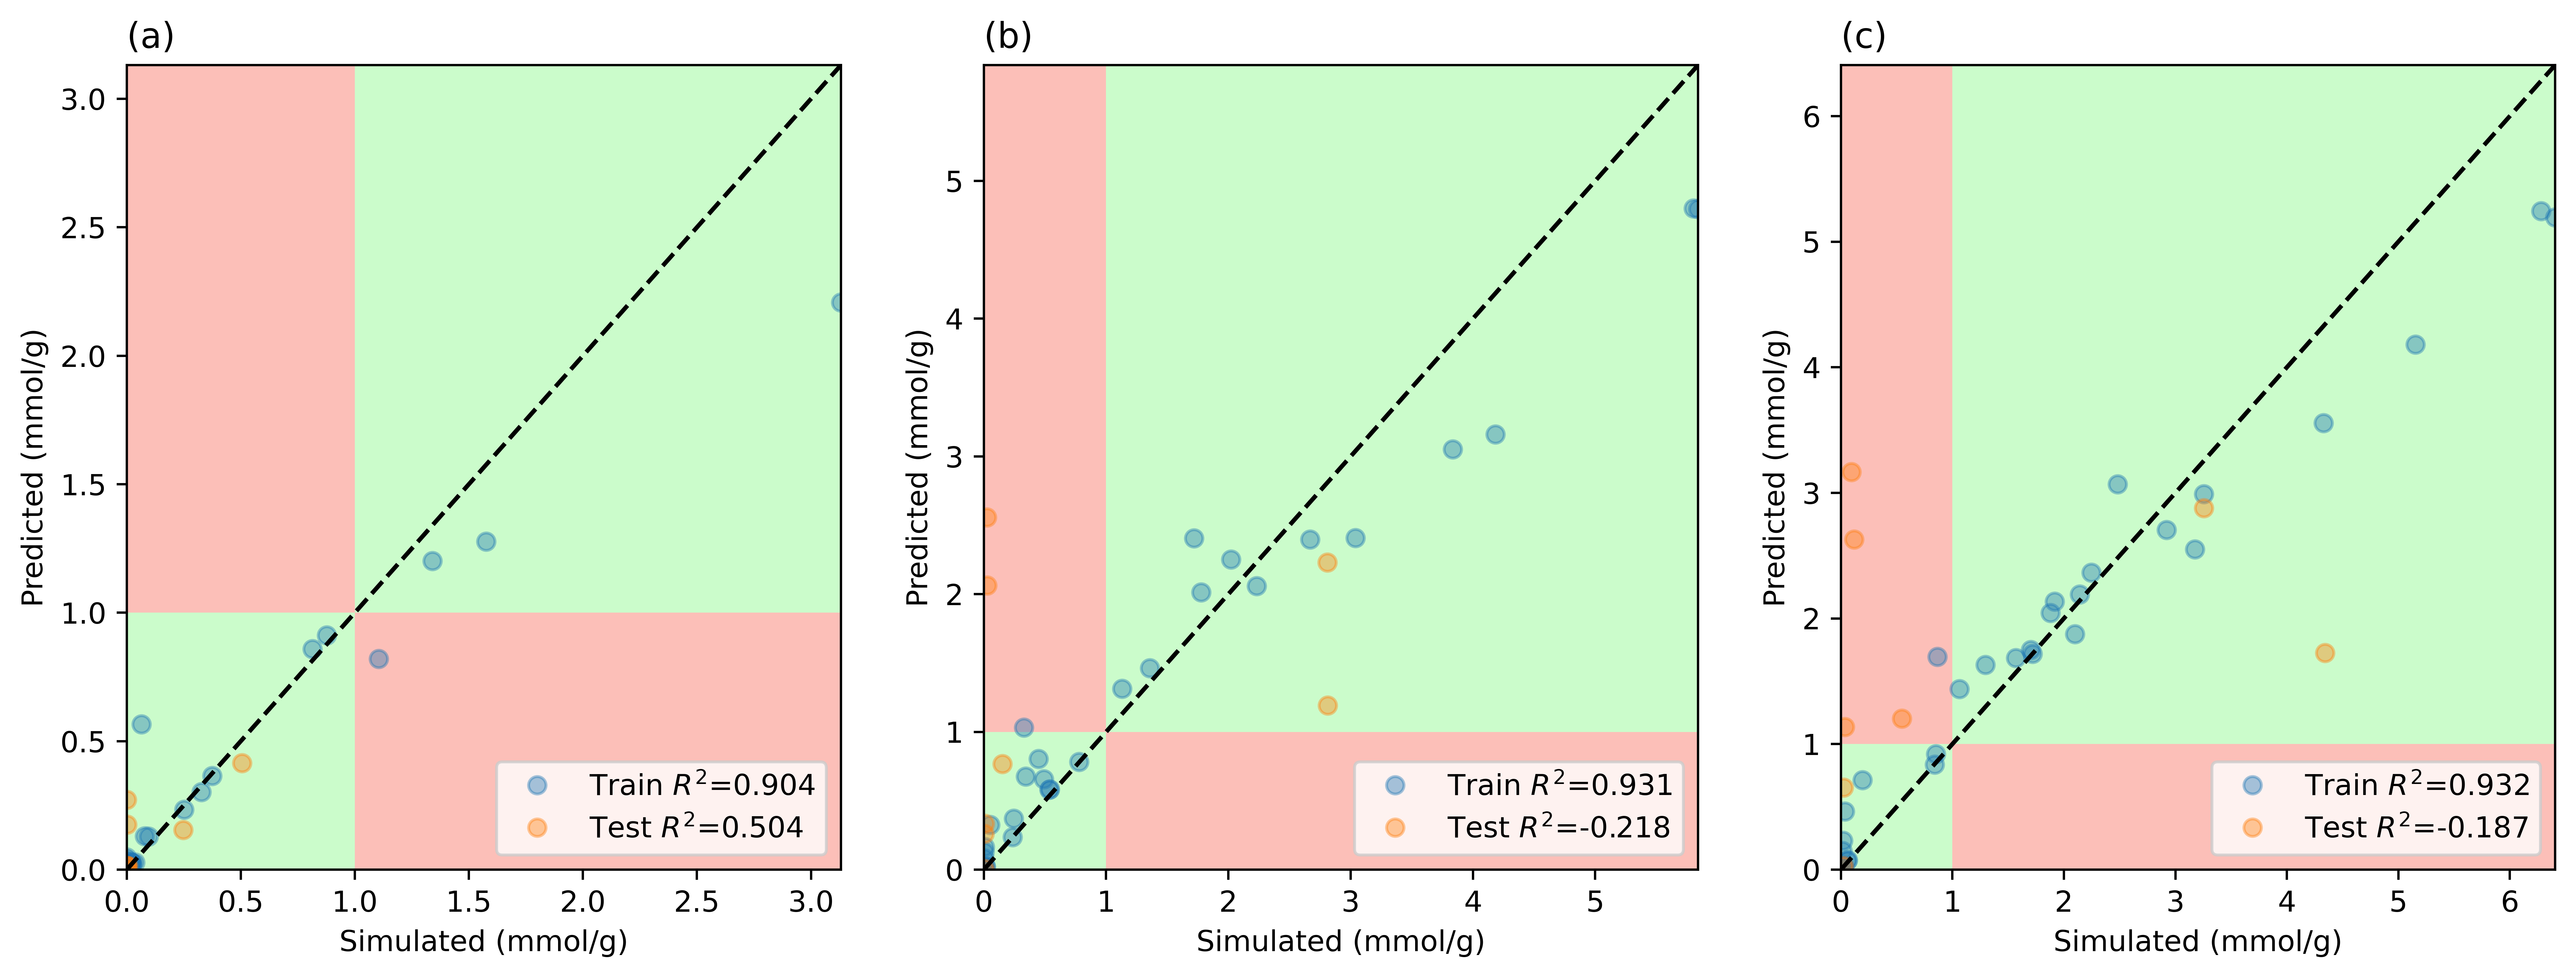

In [7]:
non_energ_pc = {}

non_energ_pc['1 mmol/g'] = {}
fig, ax = plt.subplots(1,3,dpi=700,figsize = (15,5))

X,y = X_y_from_pressure(df,40,non_energetic_descriptors)
non_energ_pc['1 mmol/g']['40Pa'] = evaluate_ML(ml,X,y,ax[0],"(a)")

X,y = X_y_from_pressure(df,1000,non_energetic_descriptors)
non_energ_pc['1 mmol/g']['1000Pa'] = evaluate_ML(ml,X,y,ax[1],"(b)")

X,y = X_y_from_pressure(df,4000,non_energetic_descriptors)
non_energ_pc['1 mmol/g']['4000Pa'] = evaluate_ML(ml,X,y,ax[2],"(c)")

# Feature Importances (without the Henry Coefficient)

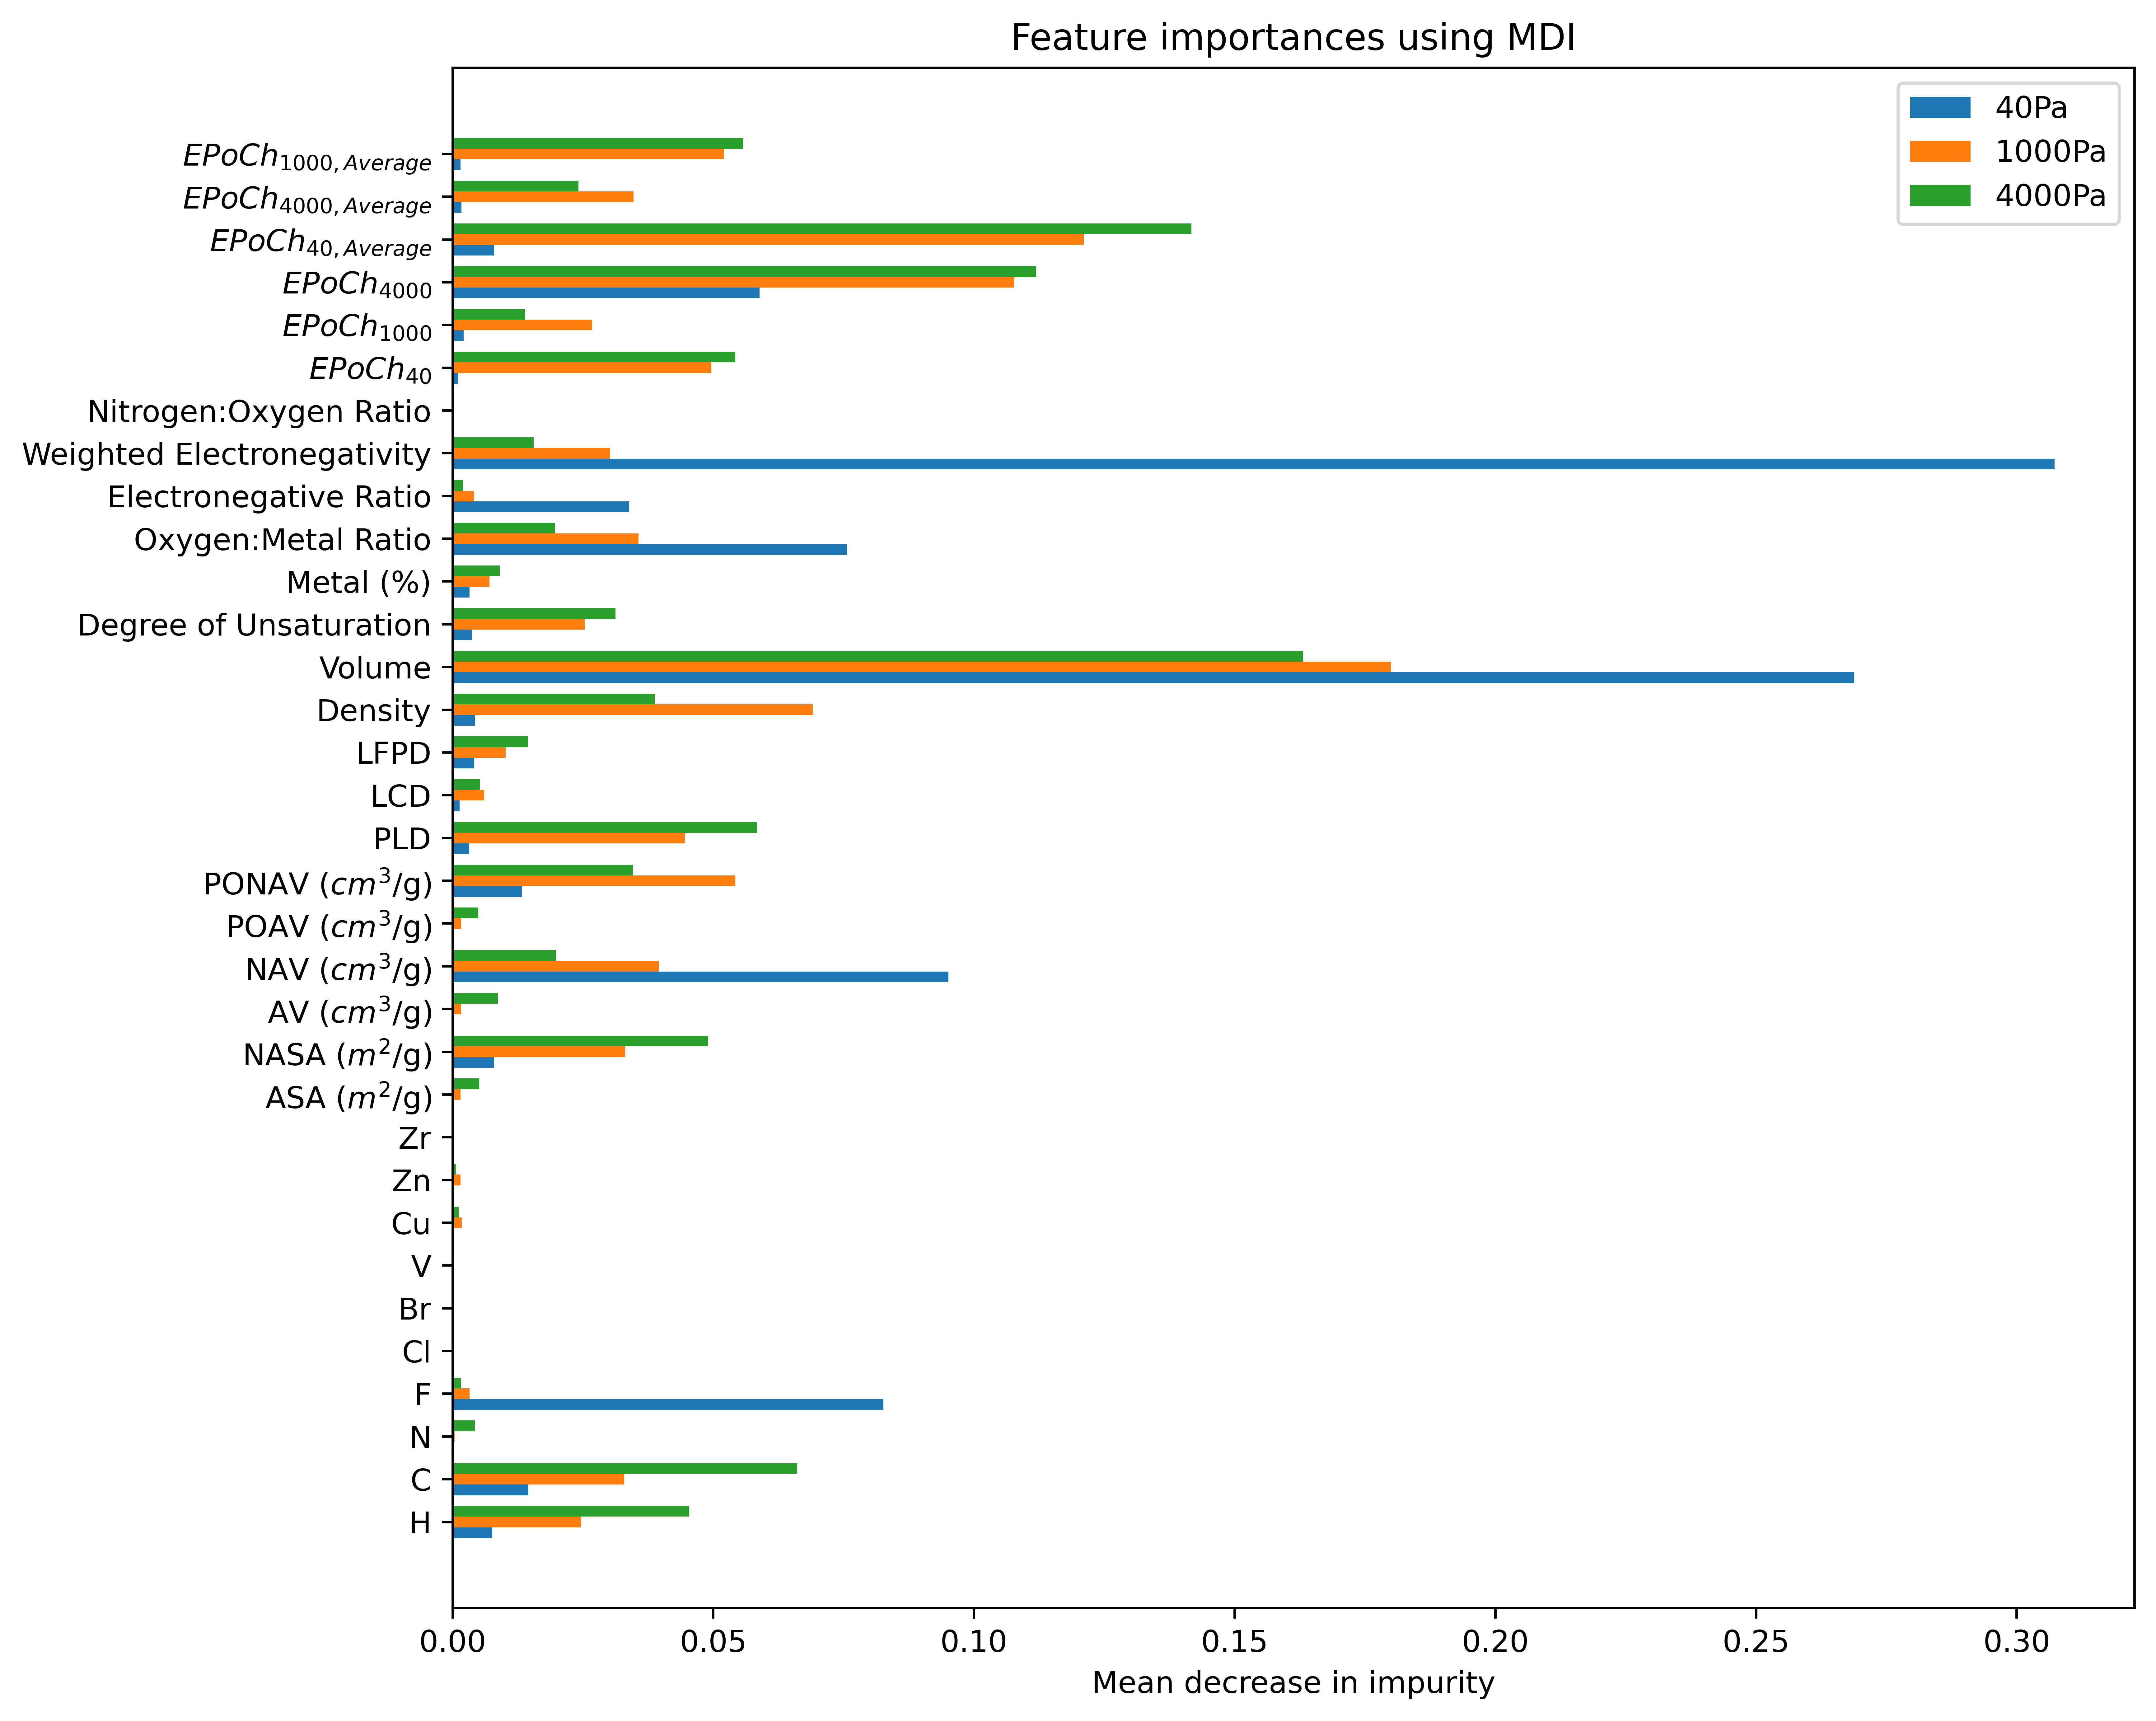

In [8]:
feature_importance_figure1()

# Feature Importances (All Descriptors)

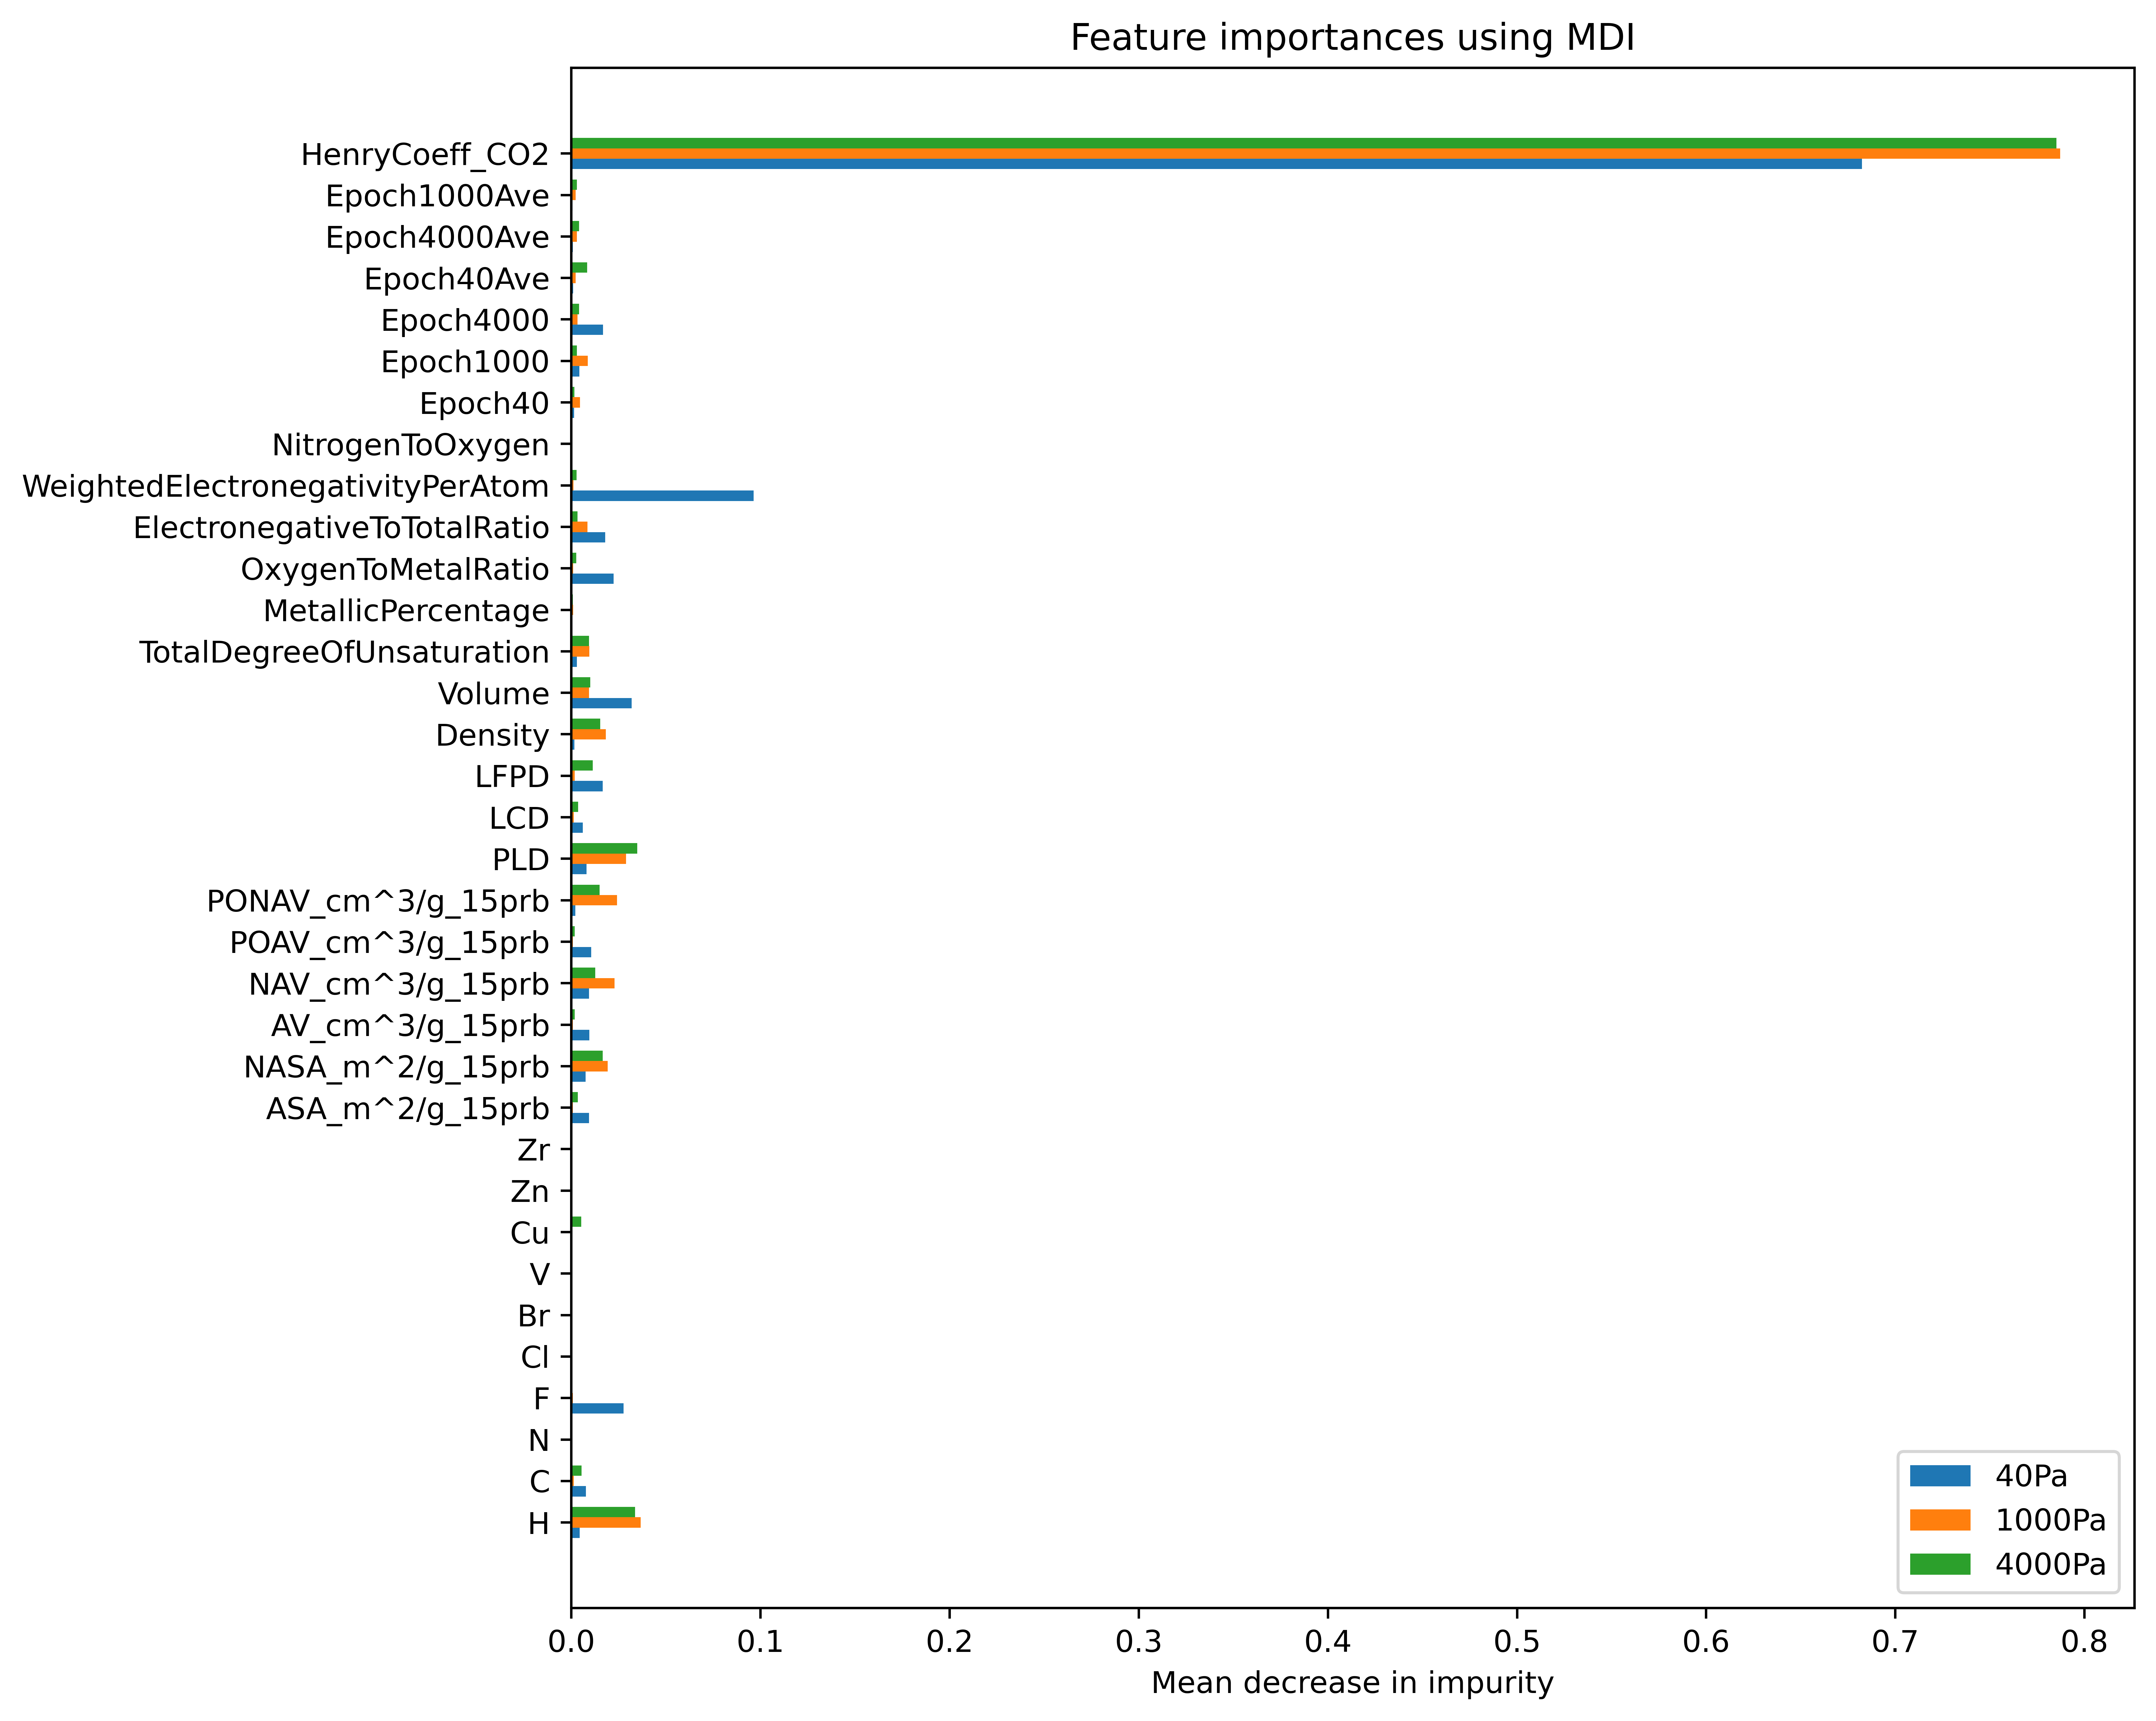

In [9]:
feature_importance_figure2()

# Comparing Feature Groups

In [10]:
pressures = [40,1000,4000]

Summary = {"Pressure":[], "Features":[], "R2": [], "RMSE":[]}

print("Pressure,Features,R2(Train),RMSE(Train), R2(Test),RMSE(Test), ")
for P in pressures:
    current = df[df.Pressure == P]
    X_train_intermediate, X_test_intermediate, y_train, y_test = train_test_split(current, current['Uptake'], test_size=0.2,random_state = SEED) 

    for combination in combinations:
        feats = combinations[combination]
        X_train, X_test =X_train_intermediate[feats], X_test_intermediate[feats]
        ml.fit(X_train,y_train)
        test_pred   = ml.predict(X_test)
        test_r2     = r2_score(y_test,test_pred)
        train_pred  = ml.predict(X_train)
        train_r2    = r2_score(y_train,train_pred)
        rmse        = mean_squared_error(y_test,test_pred)**.5
        train_rmse  = mean_squared_error(y_train,train_pred)**.5
        Summary['Pressure'].append(P)
        Summary['Features'].append(combination)
        Summary['R2'].append(test_r2)
        Summary['RMSE'].append(rmse)
        print(f"{P:<10}   {combination:<12}   {train_r2:<5.4f}   {train_rmse:<5.4f}   {test_r2:<5.4f}   {rmse:<5.4f}")
        
Summary['Timings'] = []
for i in Summary['Features']:
    Summary['Timings'].append(TPF[i])
    
s = pd.DataFrame(Summary)

Pressure,Features,R2(Train),RMSE(Train), R2(Test),RMSE(Test), 
40           A+B+C          0.9124   0.1992   0.4195   0.1332
40           A+B+C+D        0.9039   0.2087   0.5037   0.1231
40           A+B+C+E        0.9475   0.1542   0.8682   0.0635
40           All            0.9451   0.1577   0.8663   0.0639
1000         A+B+C          0.9294   0.4453   -0.1119   1.2673
1000         A+B+C+D        0.9312   0.4394   -0.2175   1.3261
1000         A+B+C+E        0.9706   0.2872   0.8666   0.4389
1000         All            0.9706   0.2871   0.8683   0.4361
4000         A+B+C          0.9307   0.4713   -0.1208   1.7095
4000         A+B+C+D        0.9318   0.4677   -0.1872   1.7594
4000         A+B+C+E        0.9503   0.3994   0.8974   0.5173
4000         All            0.9531   0.3877   0.8908   0.5337


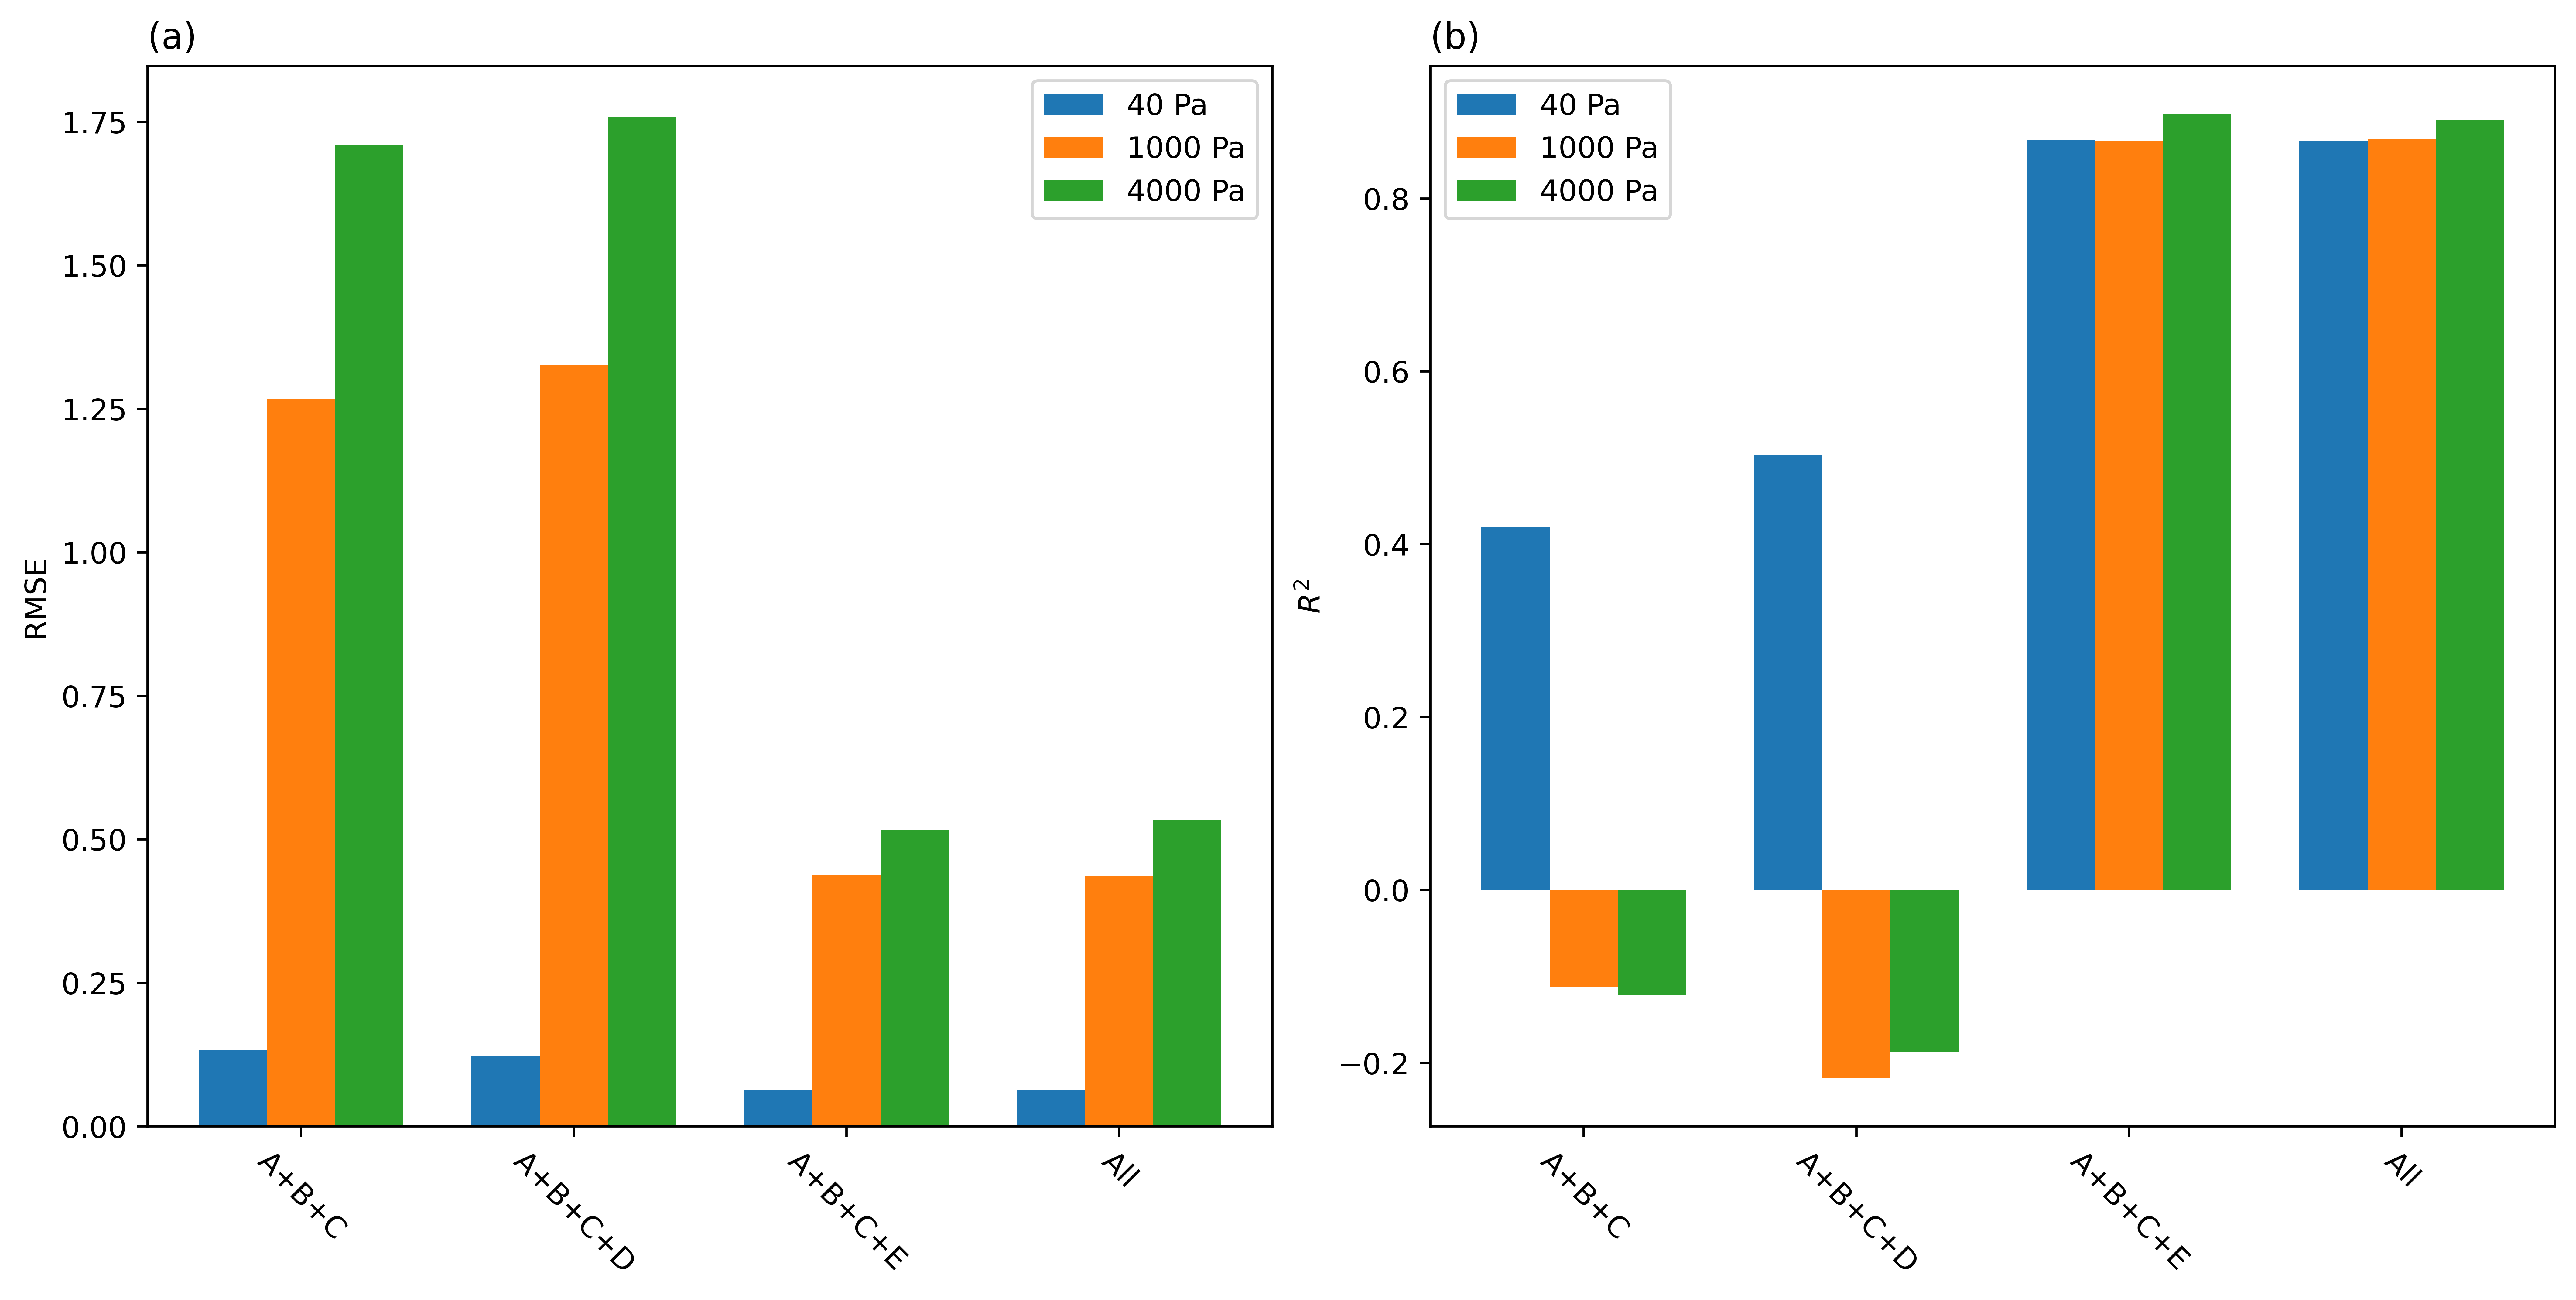

In [11]:
show_RMSE_and_R2_metrics(s)